In [1]:
from SHARED.vf_TR_class import *
import seaborn as sns

model_path = "models/SAC/deterministic/best_model_agent_11_abs.zip"
env_path   = "models/SAC/deterministic/vecNormEnv_agent_11_abs.pkl"

2024-05-26 07:58:50.492380: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-26 07:58:50.518872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 07:58:50.518901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 07:58:50.519709: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-26 07:58:50.524422: I tensorflow/core/platform/cpu_feature_guar

In [ ]:

my_value_function = value_function_TR(input_dim=12,hidden_dim=128,learning_rate=1e-3,batch_size=128)
# data_points,trajectories = my_value_function.sim_with_mpc(num_traj=30,spread=0.1)

data_points,trajectories = my_value_function.sim_with_agent(num_traj=1000,spread=0.5,model_path=model_path, env_path=env_path)

Visualizing data points

In [2]:
print (len(my_value_function.values))
print (len(data_points))


965330
965330


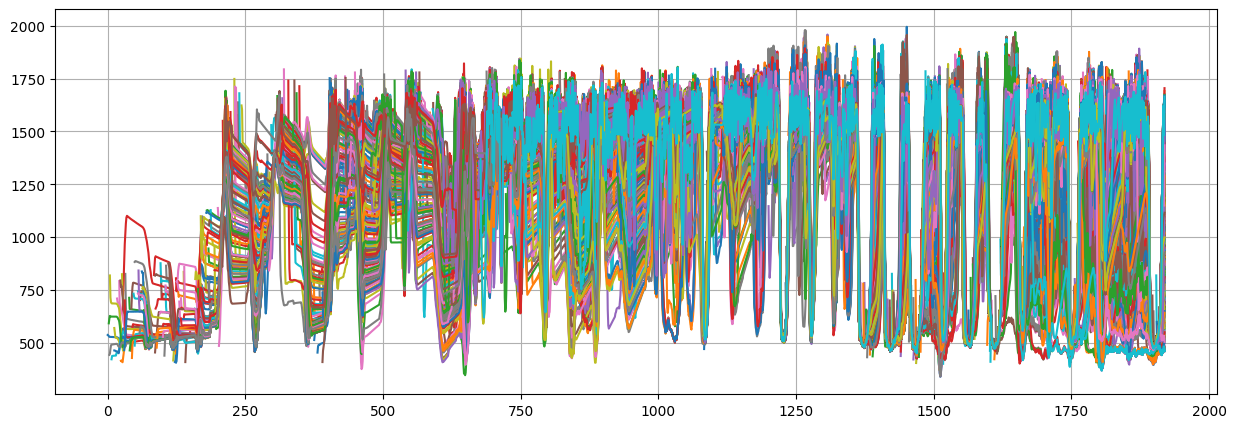

In [4]:
plt.figure(figsize=(15,5))
for t in trajectories:
    oo_log = []
    xx_log = []
    for (obs_norm, reward),(obs2store,oo,x_next,x_now,_) in trajectories[t]:
        oo_log.append(oo)
        xx_log.append(x_now)
    
    oo_log = np.vstack(oo_log)   
    xx_log = np.vstack(xx_log)  
    y1 = oo_log[:,0]
    y2 = oo_log[:,1]
    y3 = oo_log[:,2]
    y4 = oo_log[:,3]
    
    
    u1 = oo_log[:,4]
    u2 = oo_log[:,5]
    u3 = oo_log[:,6]
    
    k = oo_log[:,7]
    plt.plot (k,y2)
    plt.grid(True)

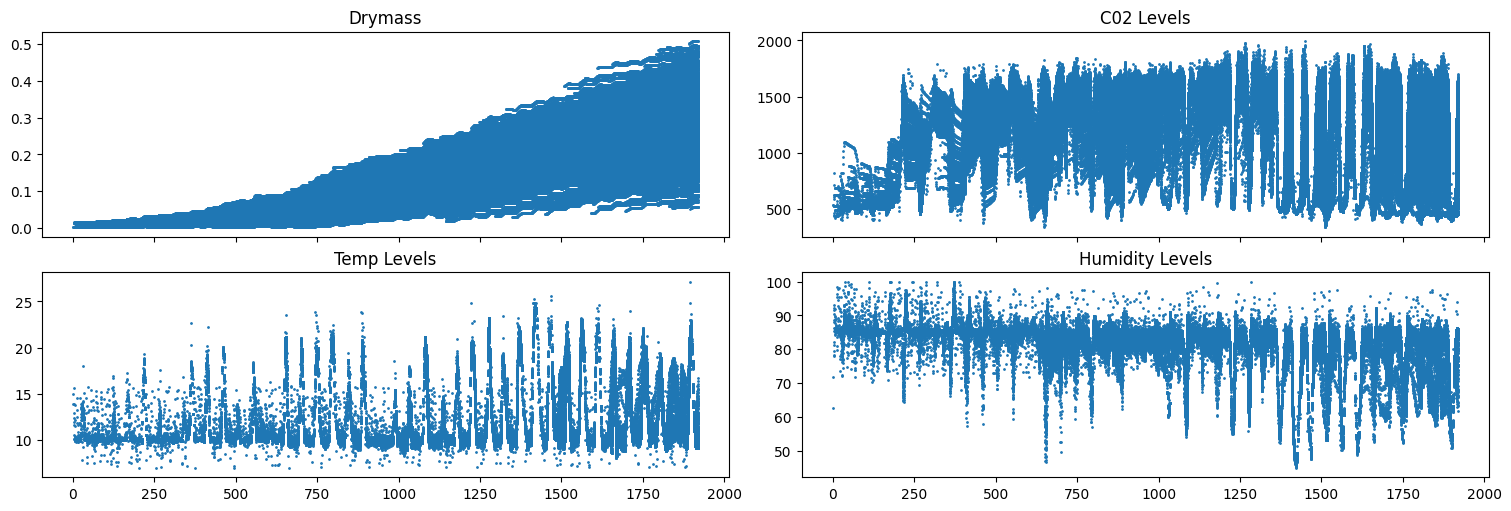

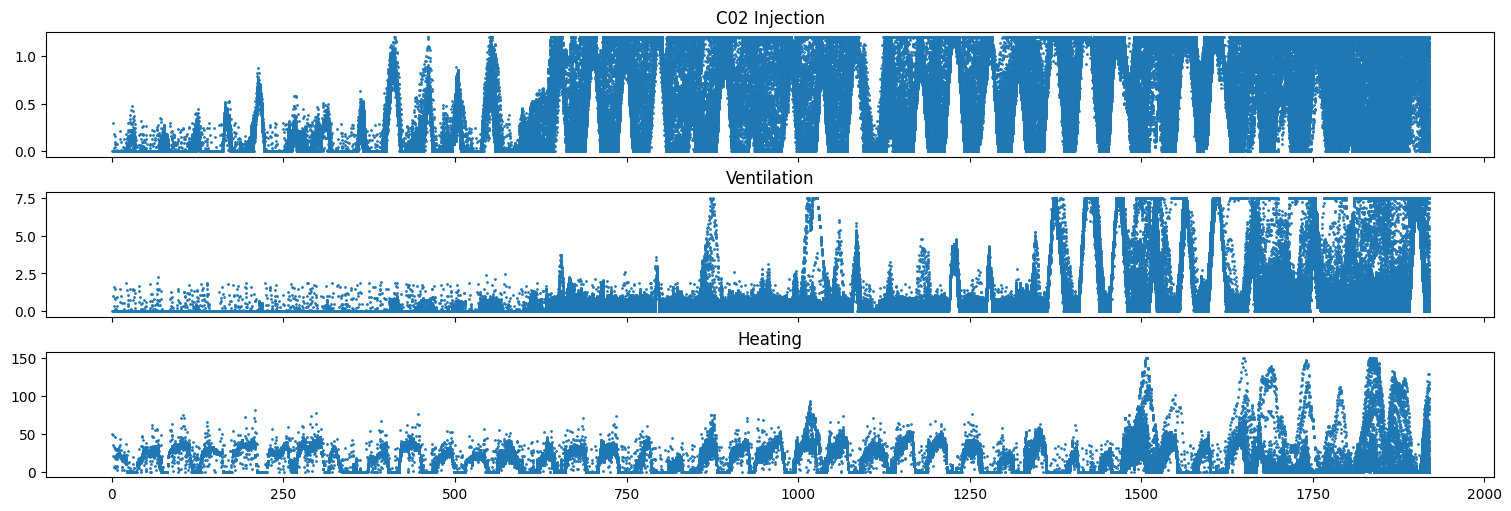

In [5]:
data_points = np.vstack(data_points)
y1 = data_points[:,0]
y2 = data_points[:,1]
y3 = data_points[:,2]
y4 = data_points[:,3]

u1 = data_points[:,4]
u2 = data_points[:,5]
u3 = data_points[:,6]

time = data_points[:,7]

fig, axs_y = plt.subplots(2,2,sharex=True, sharey=False, layout='constrained',figsize=(15, 5))

axs_y1 = axs_y[0,0]
axs_y1.set_title("Drymass")
axs_y1.scatter(time,y1, s = 1)

axs_y2 = axs_y[0,1]
axs_y2.set_title("C02 Levels")
axs_y2.scatter(time,y2, s = 1)

axs_y3 = axs_y[1,0]
axs_y3.set_title("Temp Levels")
axs_y3.scatter(time,y3, s = 1)

axs_y4 = axs_y[1,1]
axs_y4.set_title("Humidity Levels")
axs_y4.scatter(time,y4, s = 1)


fig, axs_u = plt.subplots(3,1,sharex=True, sharey=False, layout='constrained',figsize=(15, 5))
axs_u1 = axs_u[0]
axs_u1.set_title("C02 Injection")
axs_u1.scatter(time,u1, s = 1)

axs_u2 = axs_u[1]
axs_u2.set_title("Ventilation")
axs_u2.scatter(time,u2, s = 1)

axs_u3 = axs_u[2]
axs_u3.set_title("Heating")
axs_u3.scatter(time,u3, s = 1)

In [7]:
my_vf = value_function_TR(input_dim=12,hidden_dim=32,learning_rate=1e-3,batch_size=1024)
my_vf.values  = copy.deepcopy(my_value_function.values)
my_vf.trajectories = copy.deepcopy(my_value_function.trajectories)
print (len(my_vf.values))
my_vf.train(epochs=200)

965330
Total training iterations:151000


In [9]:
save_path = "models/VF/Deterministic/agent_11_tr_deep_less.zip"
torch.save (my_vf.neural_net,save_path)

100%|██████████| 1920/1920 [00:01<00:00, 1093.35it/s]


----------------------------  -----------
EPI                (EURO/m2)     4.96257
Total growth       (kg/m2)       0.303865
Total C02 usage    (kg/m2)       1.05686
Total Heating      (kWh)        12.55
Computational Time (s)
Temp violations    (deg)       110.007
C02 violations     (ppm)      3311.43
FINAL PERFORMANCE                4.2683
----------------------------  -----------


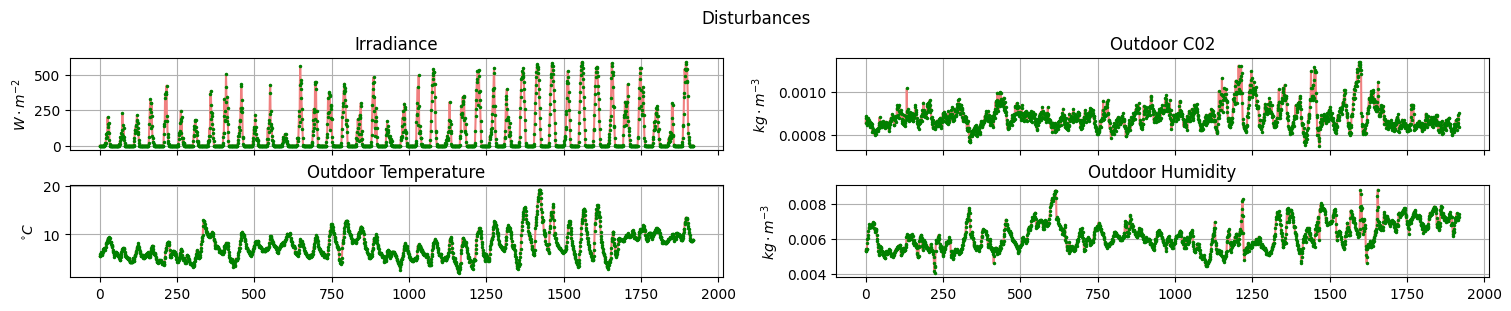

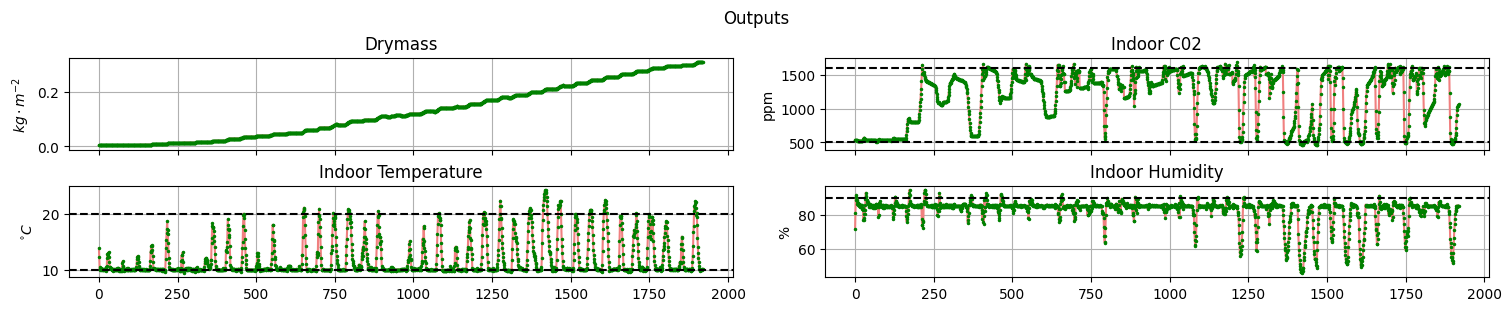

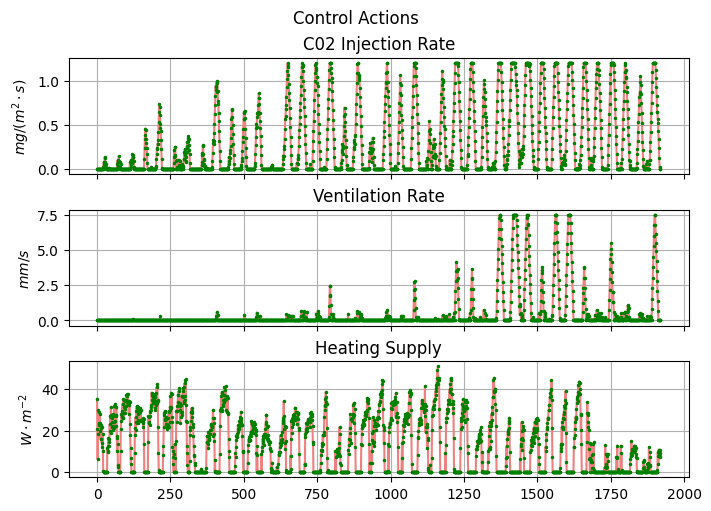

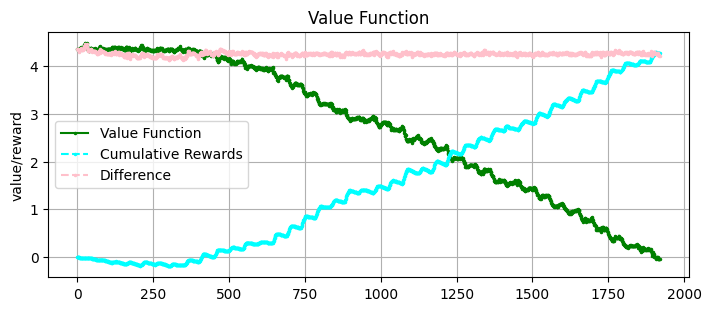

In [2]:
my_vf = value_function_TR(input_dim=2,hidden_dim=128,learning_rate=1e-3,batch_size=1024)
my_vf.neural_net = torch.load("models/VF/Deterministic/agent_11_abs_tr_shallow_full.zip")
Y_log,_ = my_vf.test_with_agent(test_episodes=1,spread=0.5)
y1_main = Y_log[:,0]

In [3]:
(y1_main[1919]*(1+0.7) + 0.01)*1000

532.518297646679

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


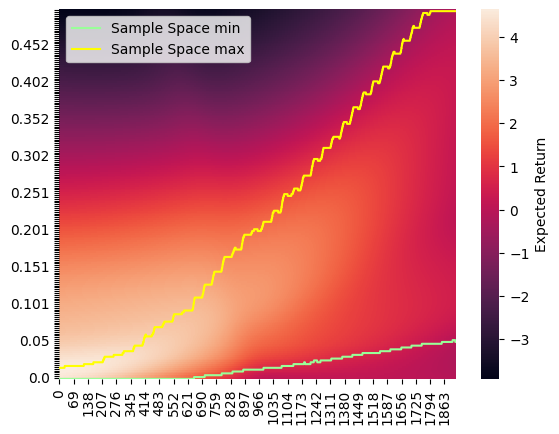

In [4]:
'''Growth rate'''
from SHARED.vf_TR_class import *
import seaborn as sns

model_path = "models/SAC/deterministic/best_model_agent_11_abs.zip"
env_path   = "models/SAC/deterministic/vecNormEnv_agent_11_abs.pkl"



max_growth = 0.5
min_growth = 0
growth_range = np.linspace(min_growth,max_growth,200)

env = greenhouseEnv()
env.random_starts = False
env.stochastic = False
env.using_mpc = False  
obs, _ =env.reset()

env_norm = greenhouseEnv(use_growth_dif=False)
env_norm = DummyVecEnv([lambda: env_norm])
env_norm = VecNormalize(env_norm, norm_obs = True, norm_reward = False, clip_obs = 10.,gamma=1)
env_norm = env_norm.load(env_path,env_norm)
env_norm.training = False


bounds_min, bounds_max = [],[]
def vf_heatmap():
    vf_grid = np.zeros((len(growth_range),max_steps))
    for i in range(max_steps):
        bounds_min.append( (y1_main[i]*(1-0.8) - 0.01)*1000)
        bounds_max.append( (y1_main[i]*(1+0.7) + 0.01)*1000)
        y_min = y1_main[i]*(1-0.8) - 0.01
        y_max = y1_main[i]*(1+0.7) + 0.01   
        for indx,growth in enumerate(growth_range):
            
            obs = np.array([0,1500,15,90,0.5,1,30,0,250,0.0009,10,0.006])
            obs[0] = growth
            obs[7] = i
            

            
            # if growth < y_max and growth> y_min:
            obs_norm = env_norm.normalize_obs(obs)
            obs2store = obs_norm
            # obs2store = normalizeState(np.array([obs[0],obs[7]]),np.array([x_min[0],0]), np.array([x_max[0],max_steps]))
            value= my_vf.evaluate_value(obs2store)         
            # else:
            #     value = None
            
            vf_grid[indx][i] = value
            
    mask = np.arange(len(growth_range)) % 20 == 0
    yticks = np.where(mask, np.round(growth_range,3), None)

    ax = sns.heatmap(vf_grid, yticklabels=yticks,cbar_kws={'label': 'Expected Return'})
    # ax.set_xlabel("Time (k)")
    # ax.set_ylabel("Drymass ($g \cdot (m^{-2})$")
    
    def find_closest_index(value, array):
        return np.abs(array - value).argmin()

    # Normalize and plot bounds_min and bounds_max lines
    bounds_min_indices = [find_closest_index(b, growth_range*1000) for b in bounds_min]
    bounds_max_indices = [find_closest_index(b, growth_range*1000) for b in bounds_max]

    ax.plot(np.arange(max_steps), bounds_min_indices, color=(0.6, 1.0, 0.6), label='Sample Space min')
    ax.plot(np.arange(max_steps), bounds_max_indices, color='yellow', label='Sample Space max')
    # ax.title("$")
    plt.legend()    
    # ax.pl
    ax.invert_yaxis()  # Invert y-axis on the heatmap object
    plt.savefig('figures/shallow_full_heatmap.eps', format='eps')
    plt.show()


vf_heatmap()
